In [1]:
%load_ext autoreload
%autoreload 2

## Privacy of Student Depression Data
A popular Kaggle dataset claims to have taken privacy into account. Let's test that with some of the privacy metrics we studied.

# The Data
Overview 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file_path = "./student_depression_dataset.csv"

df = pd.read_csv(file_path)


display(df)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']


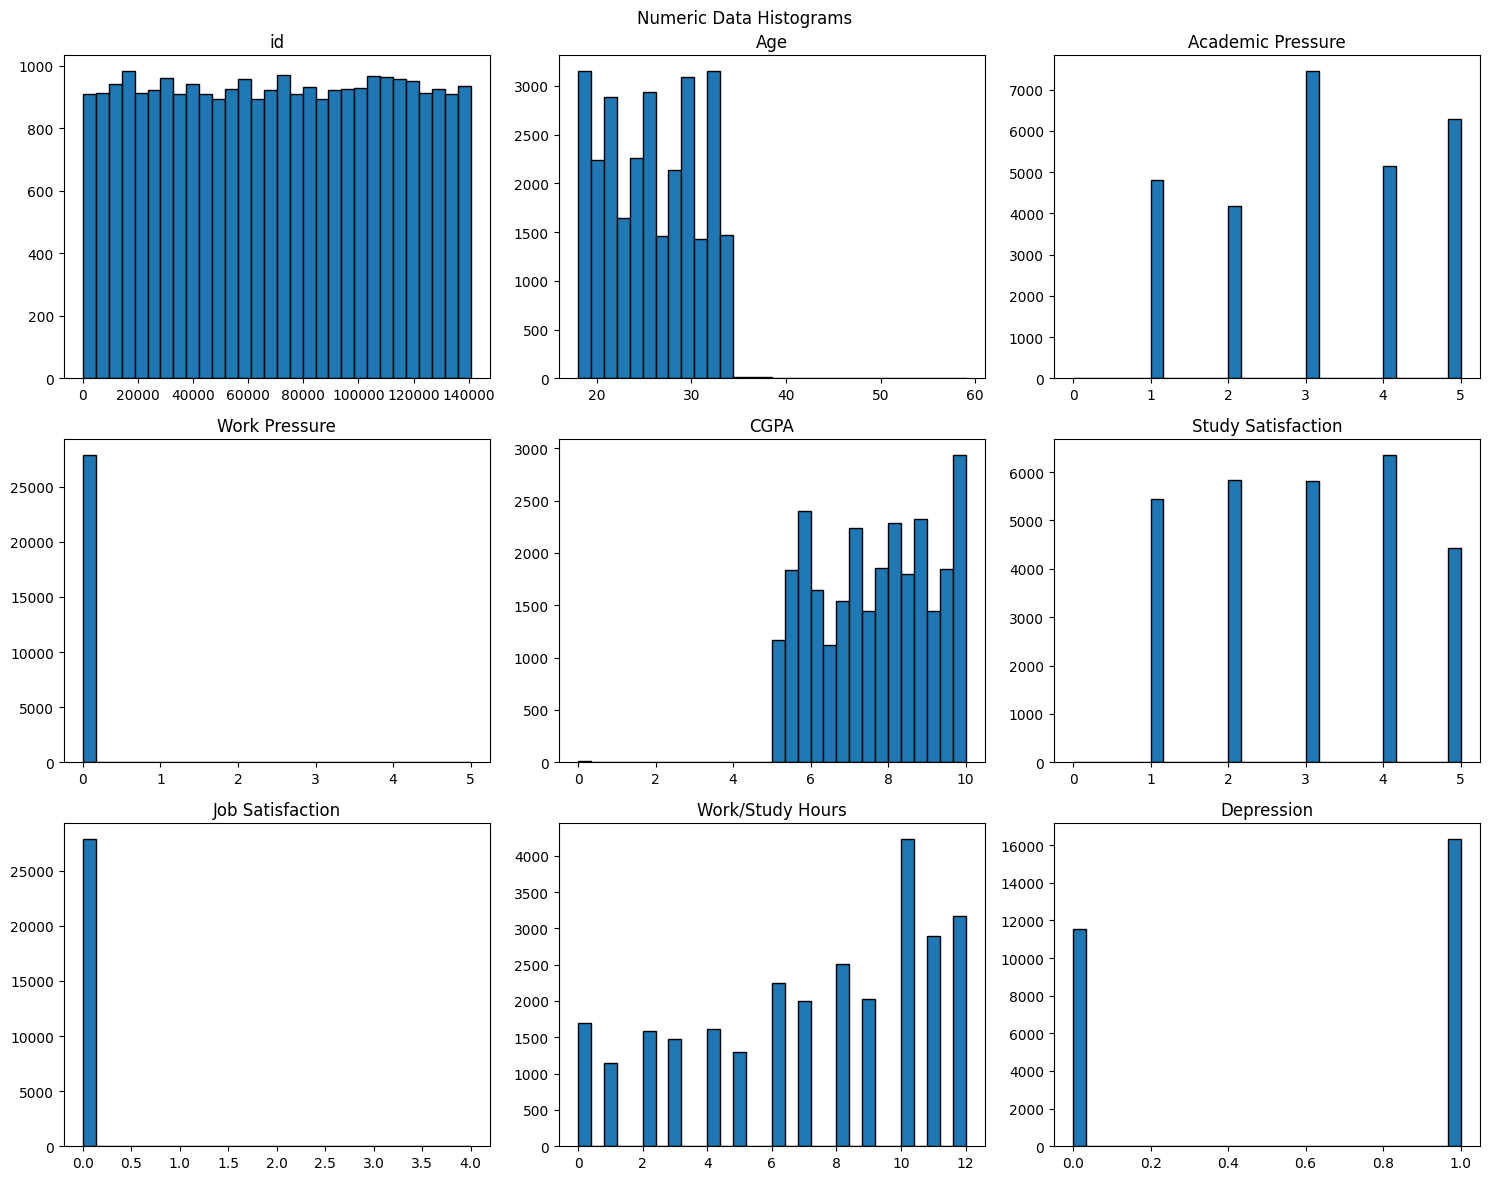

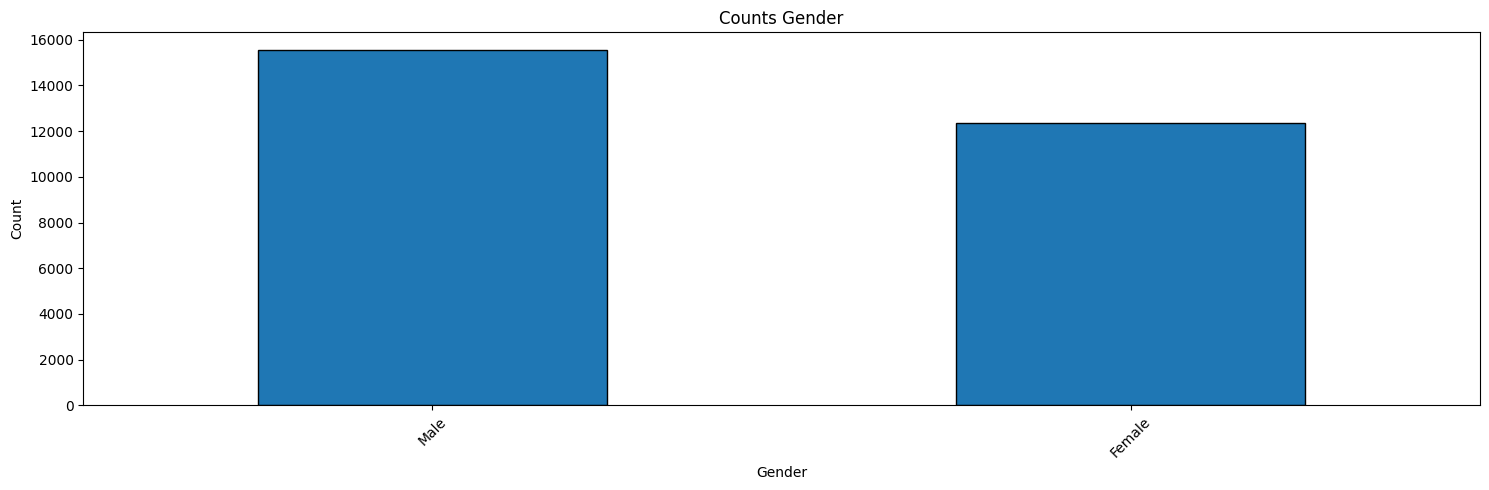

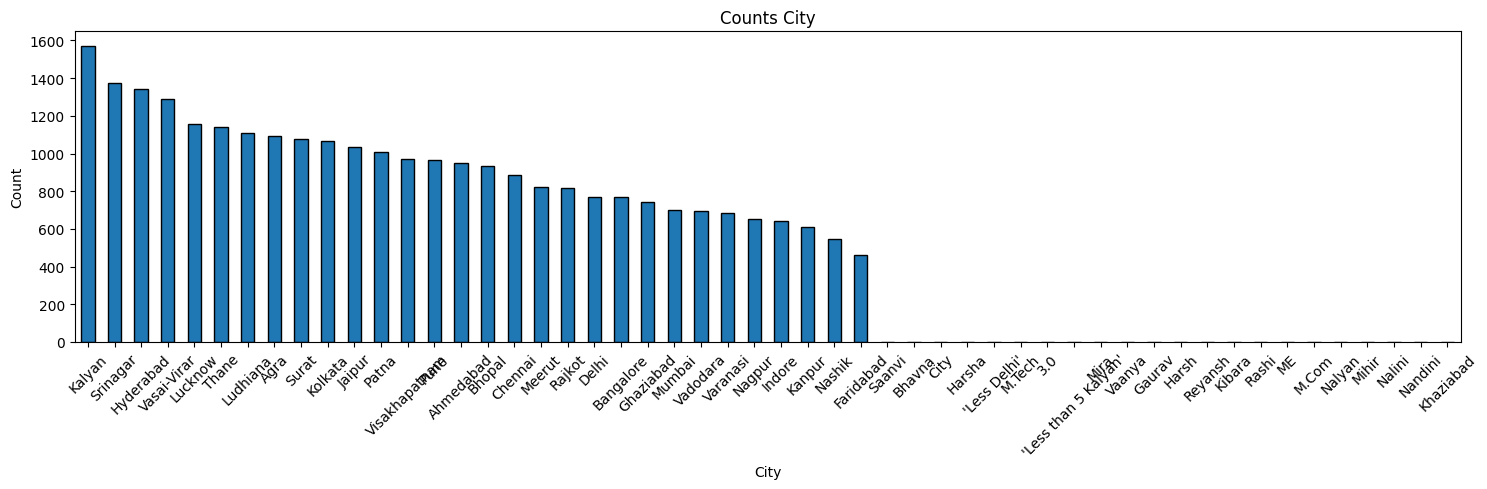

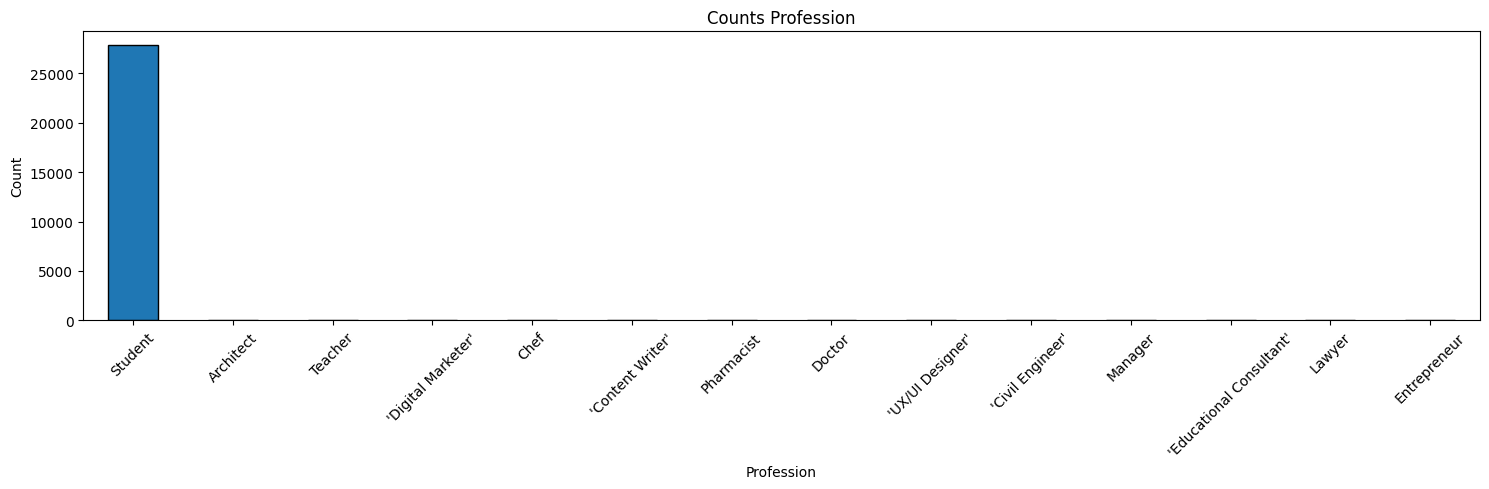

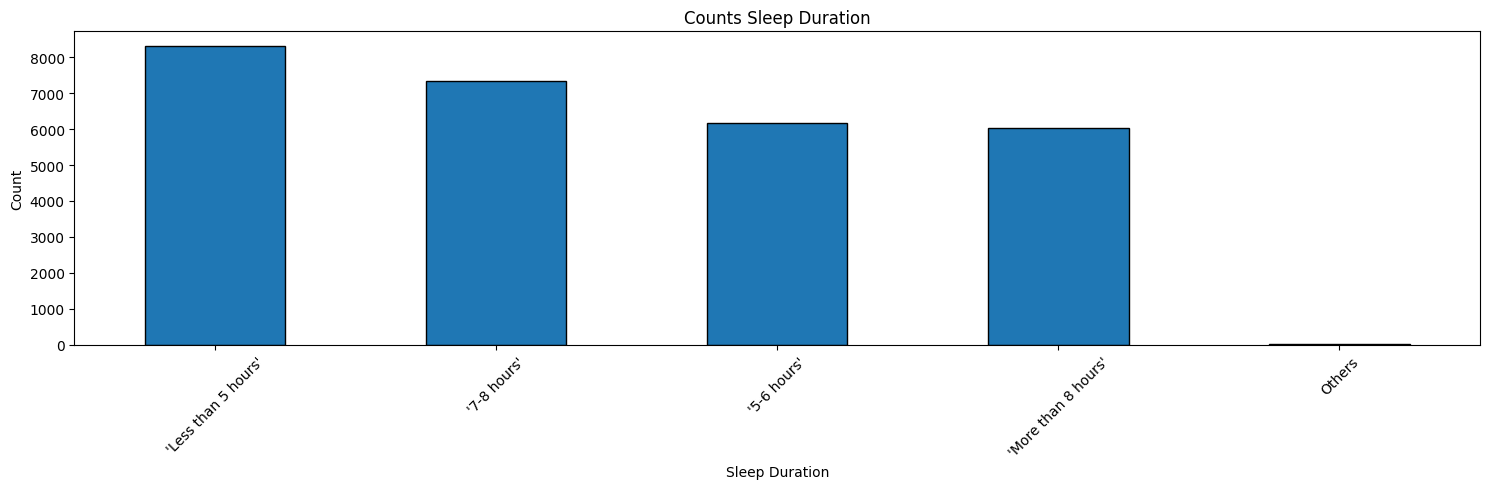

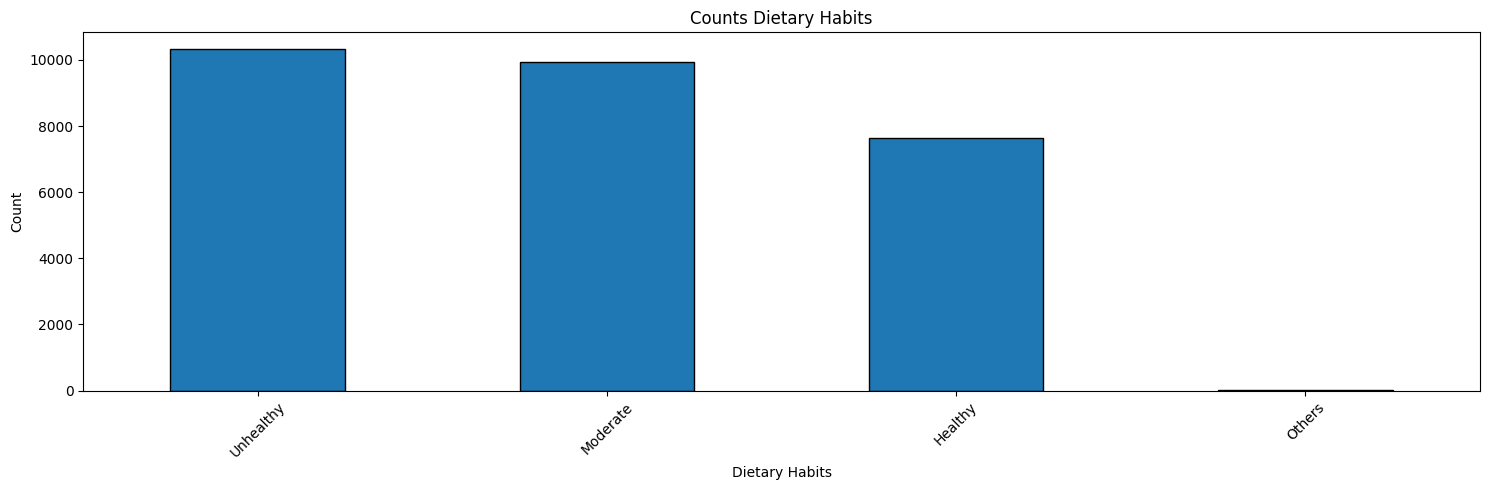

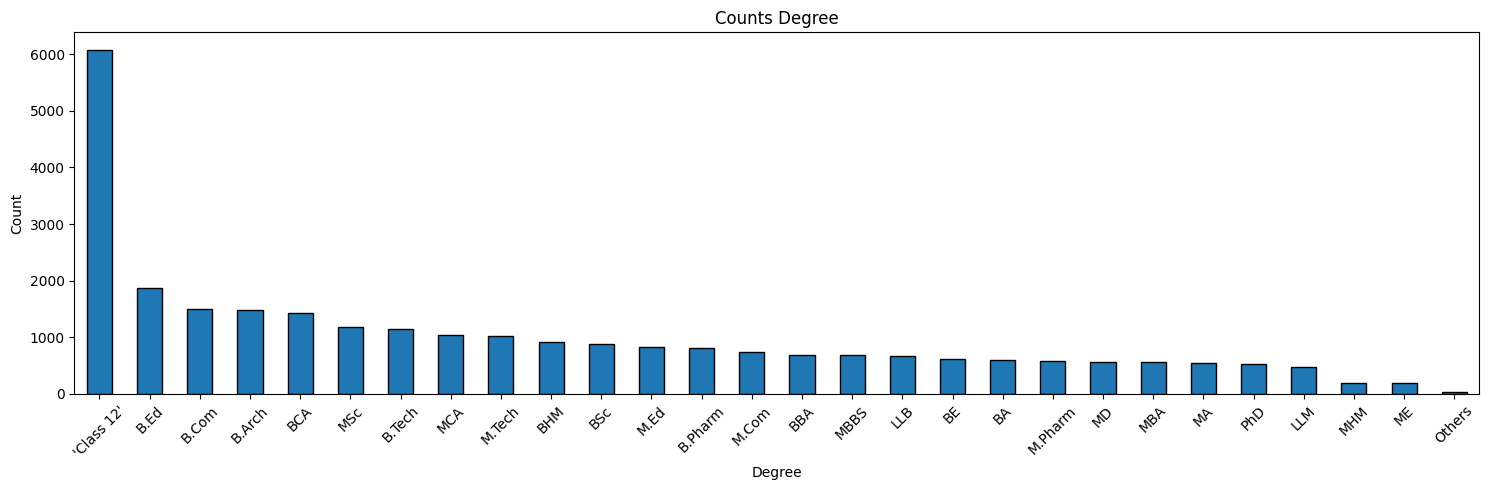

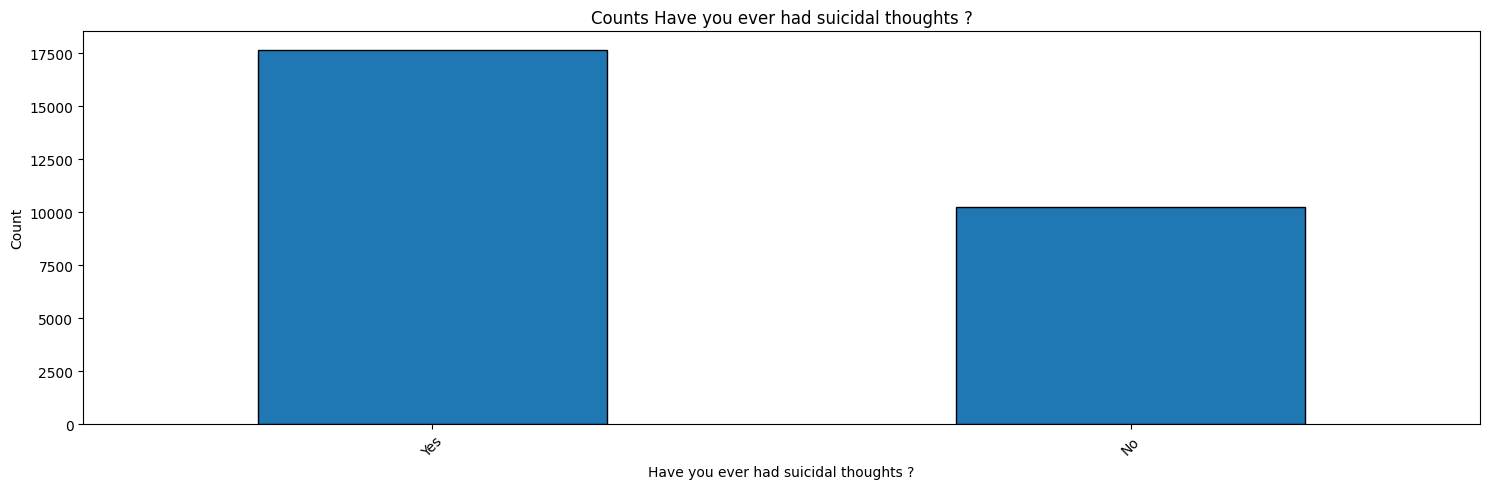

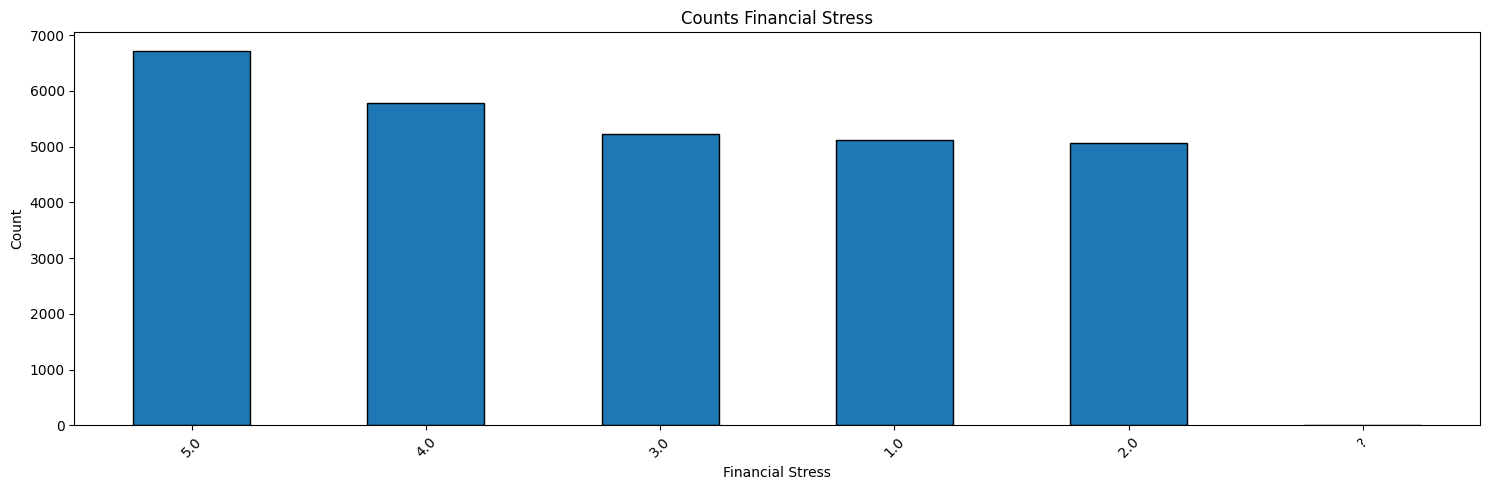

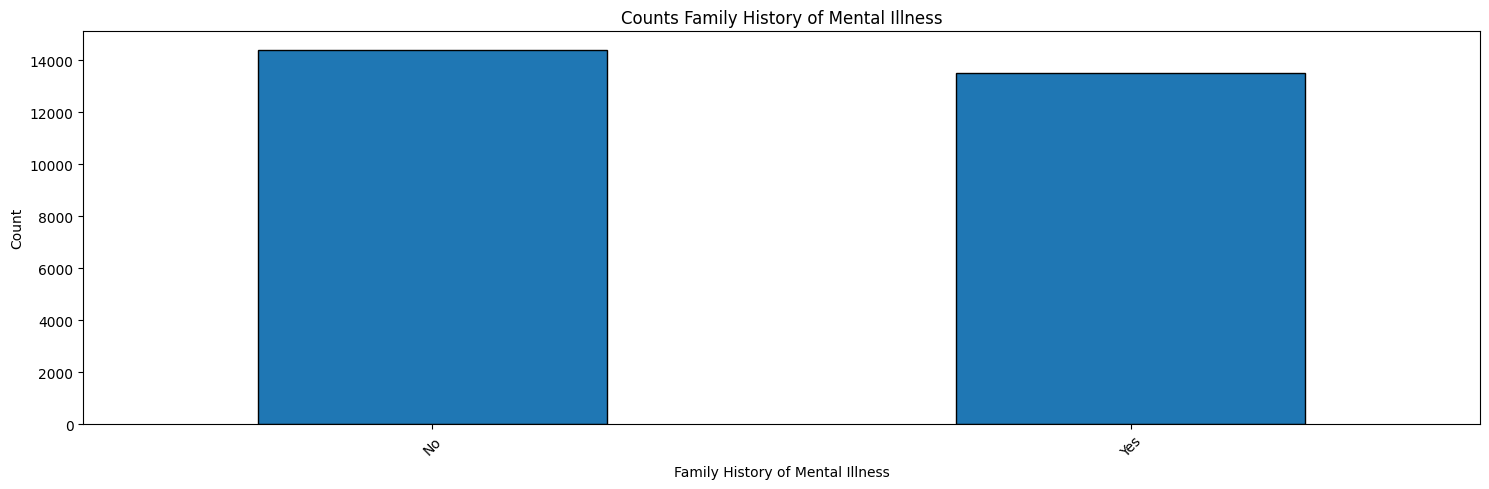

In [3]:
# Plot histograms for all numeric columns
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
#categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns


print(df['City'].unique())

# Plot numeric histograms
df[numeric_cols].hist(figsize=(15, 12), bins=30, edgecolor='black', grid=0)
plt.suptitle('Numeric Data Histograms')
plt.tight_layout()
plt.show()

# Plot bar charts for categorical columns (top 20 values only to avoid clutter)
for col in categorical_cols:
    plt.figure(figsize=(15, 5))
    df[col].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f'Counts {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Import functions we wrote

In [4]:
from finalPrivacyFuncs import (
  k_anonymity,
  Mondrian,
  Mondrian_choose_cut_first_split,
  Mondrian_choose_dim_highest_distinct,
  discernability_cost,

  distinct_l_diversity,
  entropy_l_diversity,
  Mondrian_l_diversity,
  Mondrian_choose_cut_first_split_l_diversity,
)

# $k$-Anonymity

In [5]:
qID = ['Gender', 'Age', 'City']

k, grouped = k_anonymity(df, qID)
print(k)
display(grouped)

1


,Gender,Age,City,count
0,Female,18.0,Agra,17
1,Female,18.0,Ahmedabad,21
2,Female,18.0,Bangalore,22
3,Female,18.0,Bhopal,20
4,Female,18.0,Chennai,30
...,...,...,...,...
1088,Male,43.0,Rajkot,1
1089,Male,46.0,Nashik,1
1090,Male,49.0,Nagpur,1
1091,Male,54.0,Agra,1


In [6]:
# In this dataset there are 71 rows that are unique identifiers

desired_k = 10

for i in range(1, 10):
  print(i, grouped['count'].loc[grouped['count'] == i].count())

nonprivate_classes = grouped['count'].loc[grouped['count'] < desired_k].count()
print(f'There are { nonprivate_classes } equivalency classes with k < 10.')

# Join dataset so each row has the k-value of its equivalency class

df_with_counts = df.merge(grouped, how='right')
nonprivate_rows = df_with_counts['count'].loc[df_with_counts['count'] < desired_k].count()
print(f'This is {nonprivate_rows} individuals with >10% risk of identity disclosure, {nonprivate_rows * 100 / len(df):2.2f}% of the table.')
# display(df_with_counts)

1 71
2 2
3 1
4 5
5 4
6 6
7 12
8 19
9 17
There are 137 equivalency classes with k < 10.
This is 543 individuals with >10% risk of identity disclosure, 1.95% of the table.


In [7]:
# Fixing this
desired_k = 10

# Suppressing rows
# kanon_df = df_with_counts.drop(
#   df_with_counts[df_with_counts['count'] < desired_k].index
# )
# display(kanon_df)

generalized_df, boundaries = Mondrian(df, qID, desired_k, Mondrian_choose_dim_highest_distinct, Mondrian_choose_cut_first_split)

display(generalized_df)



,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,19051,"(Female,)","(18.0, 18.0)","(Agra,)",Student,3.0,0.0,6.03,4.0,0.0,Others,Unhealthy,BA,Yes,12.0,5.0,No,1
1,23427,"(Female,)","(18.0, 18.0)","(Agra,)",Student,4.0,0.0,7.53,3.0,0.0,'More than 8 hours',Healthy,'Class 12',Yes,0.0,5.0,Yes,1
2,29406,"(Female,)","(18.0, 18.0)","(Agra,)",Student,5.0,0.0,5.6,1.0,0.0,'5-6 hours',Moderate,'Class 12',No,9.0,1.0,No,0
3,33909,"(Female,)","(18.0, 18.0)","(Agra,)",Student,5.0,0.0,7.92,2.0,0.0,'Less than 5 hours',Moderate,'Class 12',No,5.0,4.0,Yes,1
4,34281,"(Female,)","(18.0, 18.0)","(Agra,)",Student,2.0,0.0,7.8,3.0,0.0,'7-8 hours',Healthy,'Class 12',Yes,8.0,1.0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,117263,"(Male,)","(34.0, 54.0)","(Agra,)",Student,1.0,0.0,6.35,4.0,0.0,'7-8 hours',Healthy,MSc,Yes,8.0,4.0,Yes,0
27897,118542,"(Male,)","(34.0, 54.0)","(Agra,)",Student,2.0,0.0,8.54,4.0,0.0,'More than 8 hours',Unhealthy,B.Arch,No,10.0,4.0,No,0
27898,121068,"(Male,)","(34.0, 54.0)","(Agra,)",Student,5.0,0.0,8.24,2.0,0.0,'5-6 hours',Moderate,BBA,Yes,10.0,3.0,No,1
27899,128709,"(Male,)","(34.0, 54.0)","(Agra,)",Student,3.0,0.0,9.39,4.0,0.0,'Less than 5 hours',Healthy,MCA,No,6.0,1.0,Yes,0


In [8]:
display(boundaries)
generalized_k, generalized_grouped = k_anonymity(generalized_df, qID)
print(f'The generalized table satisfies {generalized_k}-Anonymity')
display(generalized_grouped['count'])

,Gender,Age,City,k
0,"(Female,)","(18.0, 18.0)","(Agra,)",17
1,"(Female,)","(18.0, 18.0)","(Ahmedabad,)",21
2,"(Female,)","(18.0, 18.0)","(Bangalore,)",22
3,"(Female,)","(18.0, 18.0)","(Bhopal,)",20
4,"(Female,)","(18.0, 18.0)","(Chennai,)",30
...,...,...,...,...
963,"(Male,)","(34.0, 38.0)","(Hyderabad,)",48
964,"(Male,)","(34.0, 38.0)","(Meerut,)",26
965,"(Male,)","(34.0, 42.0)","(Kolkata,)",46
966,"(Male,)","(34.0, 42.0)","(Ludhiana,)",35


The generalized table satisfies 10-Anonymity


0      17
1      21
2      22
3      20
4      30
       ..
963    48
964    26
965    46
966    35
967    36
Name: count, Length: 968, dtype: int64

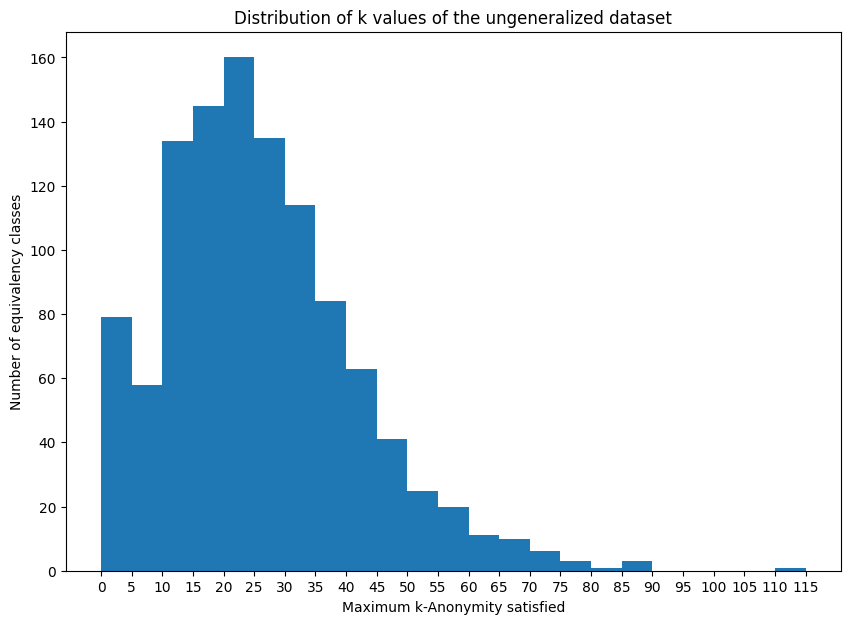

The discernibility cost of the original table is 979251


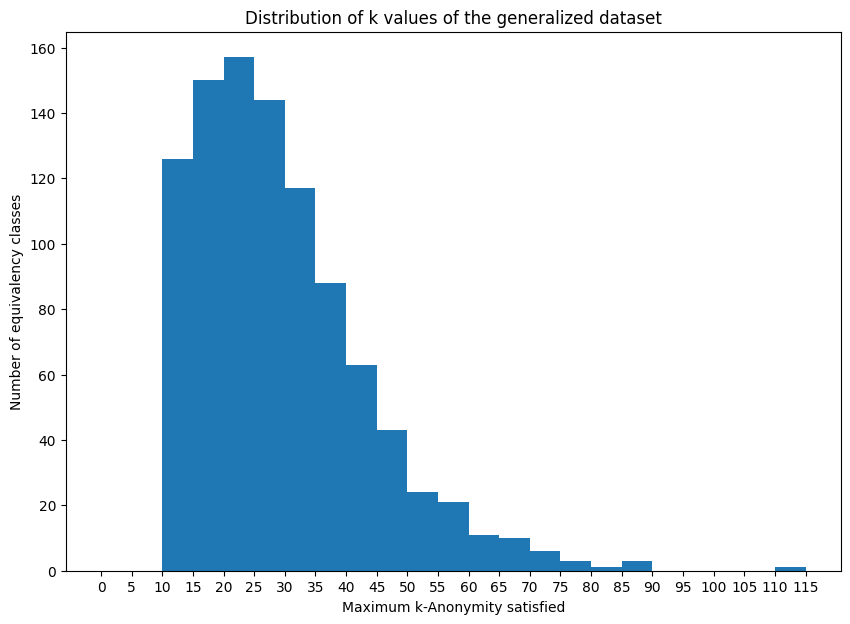

The discernibility cost of the generalized table is 996127, an increase of 101.72335795419151%


In [9]:
# Comparison between k values before and after suppressing rows
bins = range(0,120, 5)

fig = plt.figure(figsize=(10, 7))
plt.xlabel('Maximum k-Anonymity satisfied')
plt.ylabel('Number of equivalency classes')
plt.title('Distribution of k values of the ungeneralized dataset')
plt.xticks(range(0, 120, 5))

plt.hist(grouped['count'], bins=bins)
plt.show()

cost = discernability_cost(grouped)
print(f'The discernibility cost of the original table is {cost}')

fig = plt.figure(figsize=(10, 7))
plt.xlabel('Maximum k-Anonymity satisfied')
plt.ylabel('Number of equivalency classes')
plt.title('Distribution of k values of the generalized dataset')
plt.xticks(range(0, 120, 5))

plt.hist(generalized_grouped['count'], bins=bins)
plt.show()

generalized_cost = discernability_cost(generalized_grouped)
print(f'The discernibility cost of the generalized table is {generalized_cost}, an increase of {generalized_cost * 100 / cost}%')

# l-Diversity
Looking at sensitive values

,Gender,Age,City,l (CGPA)
77,Female,20.0,Mira,1
99,Female,21.0,Harsh,1
115,Female,21.0,Rashi,1
286,Female,27.0,Khaziabad,1
341,Female,29.0,Gaurav,1
414,Female,31.0,Nalyan,1
519,Male,18.0,Bhavna,1
600,Male,20.0,Reyansh,1
621,Male,21.0,Kibara,1
635,Male,21.0,Vaanya,1


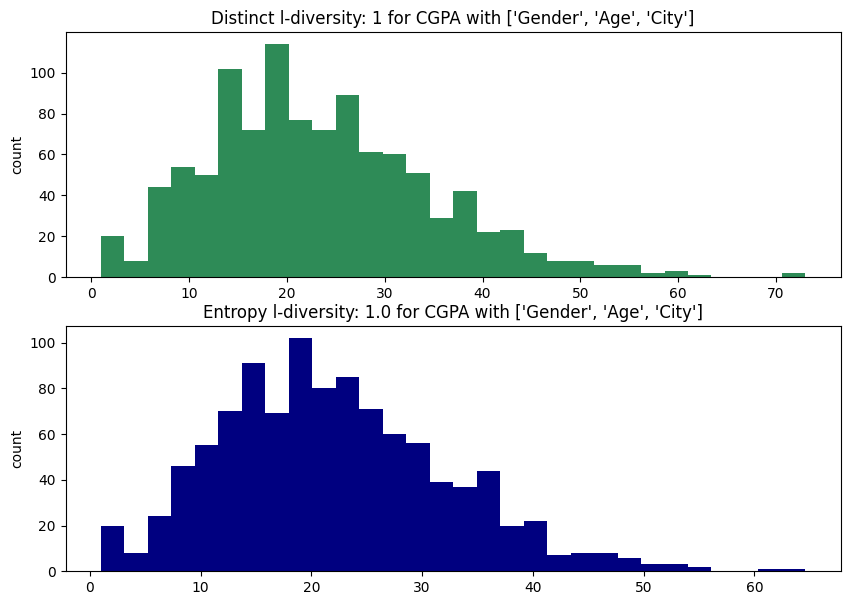

,Gender,Age,City,l (Study Satisfaction)
77,Female,20.0,Mira,1
99,Female,21.0,Harsh,1
115,Female,21.0,Rashi,1
286,Female,27.0,Khaziabad,1
341,Female,29.0,Gaurav,1
414,Female,31.0,Nalyan,1
519,Male,18.0,Bhavna,1
600,Male,20.0,Reyansh,1
621,Male,21.0,Kibara,1
635,Male,21.0,Vaanya,1


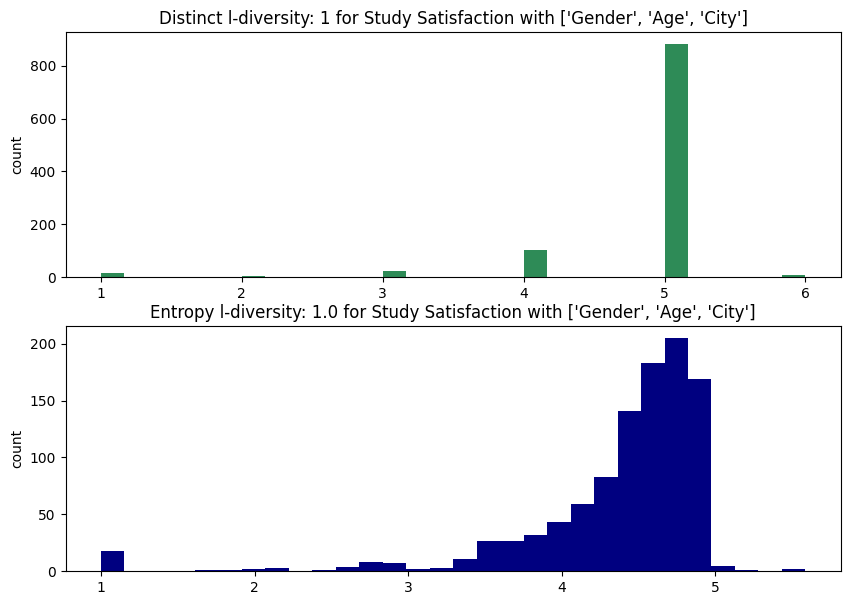

,Gender,Age,City,l (Job Satisfaction)
0,Female,18.0,Agra,1
1,Female,18.0,Ahmedabad,1
2,Female,18.0,Bangalore,1
3,Female,18.0,Bhopal,1
4,Female,18.0,Chennai,1
...,...,...,...,...
1033,Male,34.0,Thane,1
1034,Male,34.0,Vadodara,1
1035,Male,34.0,Varanasi,1
1036,Male,34.0,Vasai-Virar,1


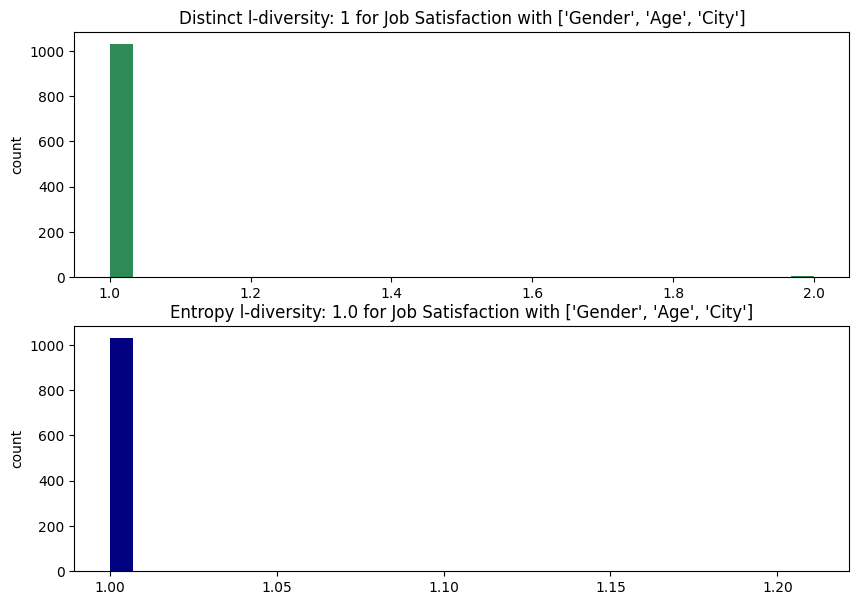

,Gender,Age,City,l (Sleep Duration)
77,Female,20.0,Mira,1
99,Female,21.0,Harsh,1
115,Female,21.0,Rashi,1
286,Female,27.0,Khaziabad,1
341,Female,29.0,Gaurav,1
414,Female,31.0,Nalyan,1
519,Male,18.0,Bhavna,1
600,Male,20.0,Reyansh,1
621,Male,21.0,Kibara,1
635,Male,21.0,Vaanya,1


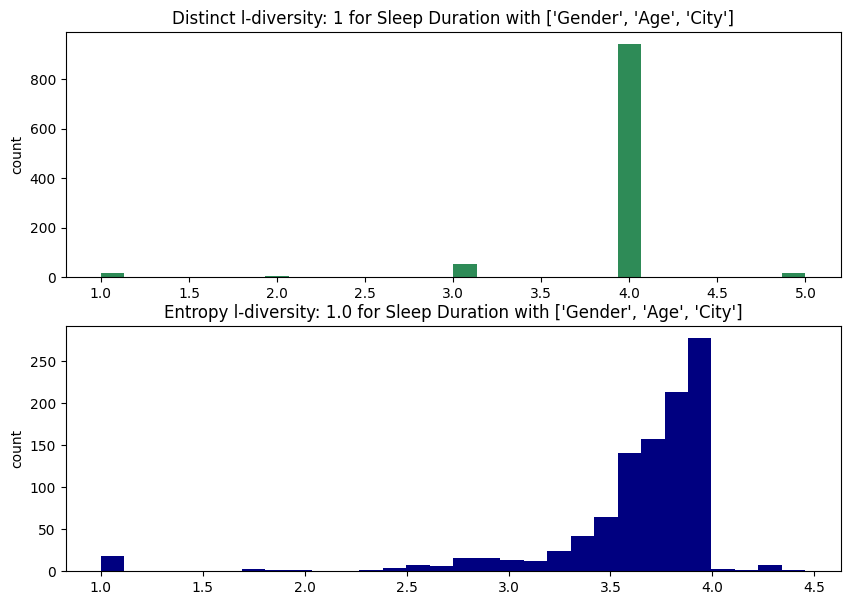

,Gender,Age,City,l (Dietary Habits)
77,Female,20.0,Mira,1
80,Female,20.0,Nashik,1
99,Female,21.0,Harsh,1
115,Female,21.0,Rashi,1
286,Female,27.0,Khaziabad,1
341,Female,29.0,Gaurav,1
414,Female,31.0,Nalyan,1
519,Male,18.0,Bhavna,1
600,Male,20.0,Reyansh,1
621,Male,21.0,Kibara,1


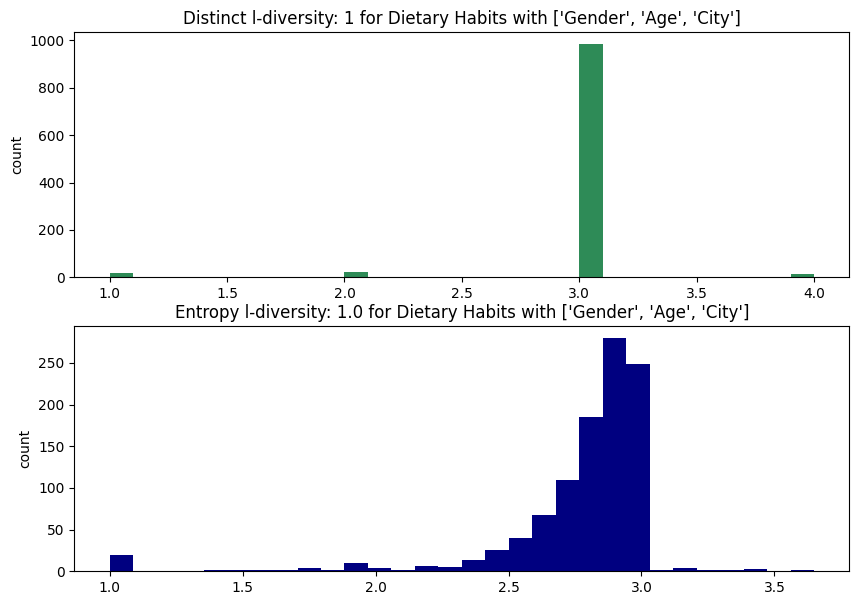

,Gender,Age,City,l (Have you ever had suicidal thoughts ?)
77,Female,20.0,Mira,1
99,Female,21.0,Harsh,1
115,Female,21.0,Rashi,1
286,Female,27.0,Khaziabad,1
341,Female,29.0,Gaurav,1
414,Female,31.0,Nalyan,1
519,Male,18.0,Bhavna,1
600,Male,20.0,Reyansh,1
621,Male,21.0,Kibara,1
635,Male,21.0,Vaanya,1


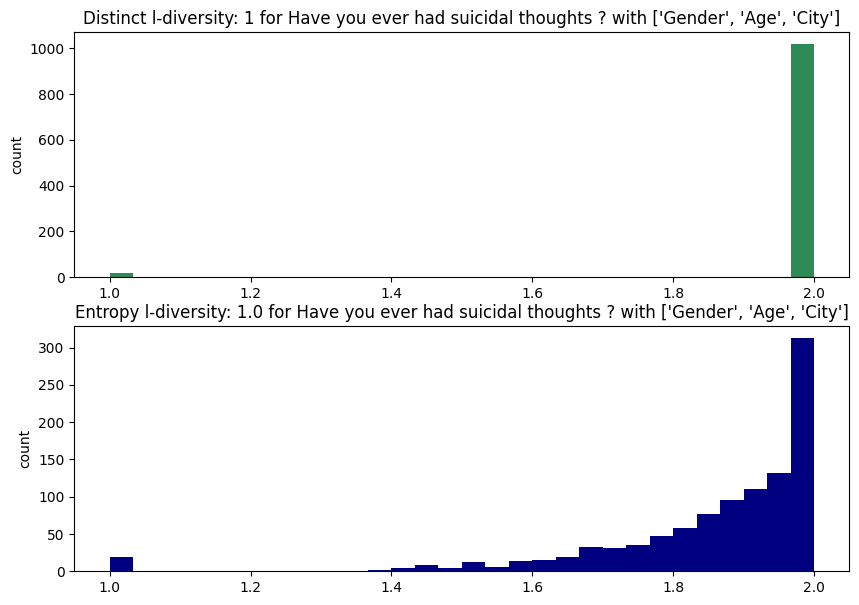

,Gender,Age,City,l (Financial Stress)
77,Female,20.0,Mira,1
99,Female,21.0,Harsh,1
115,Female,21.0,Rashi,1
286,Female,27.0,Khaziabad,1
341,Female,29.0,Gaurav,1
414,Female,31.0,Nalyan,1
519,Male,18.0,Bhavna,1
600,Male,20.0,Reyansh,1
621,Male,21.0,Kibara,1
635,Male,21.0,Vaanya,1


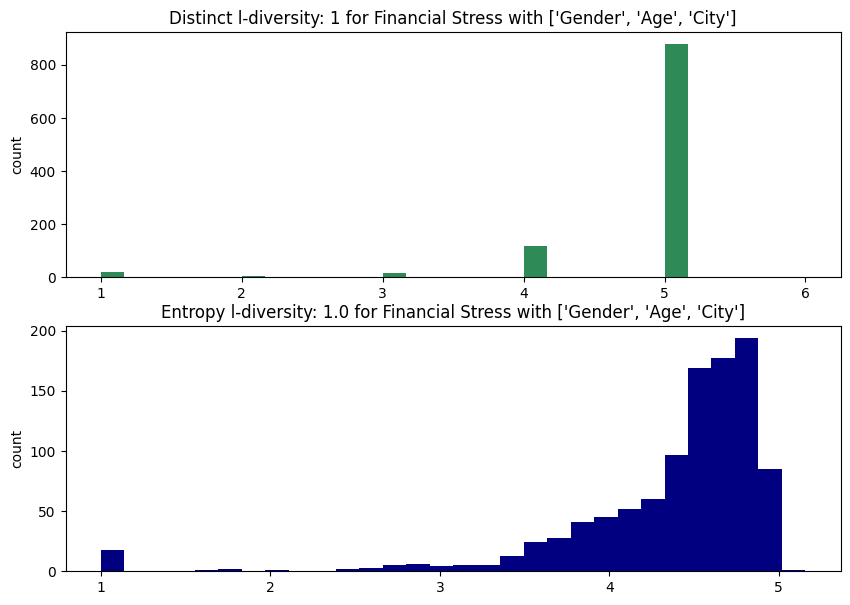

,Gender,Age,City,l (Family History of Mental Illness)
77,Female,20.0,Mira,1
99,Female,21.0,Harsh,1
115,Female,21.0,Rashi,1
262,Female,26.0,Nashik,1
286,Female,27.0,Khaziabad,1
341,Female,29.0,Gaurav,1
414,Female,31.0,Nalyan,1
519,Male,18.0,Bhavna,1
600,Male,20.0,Reyansh,1
621,Male,21.0,Kibara,1


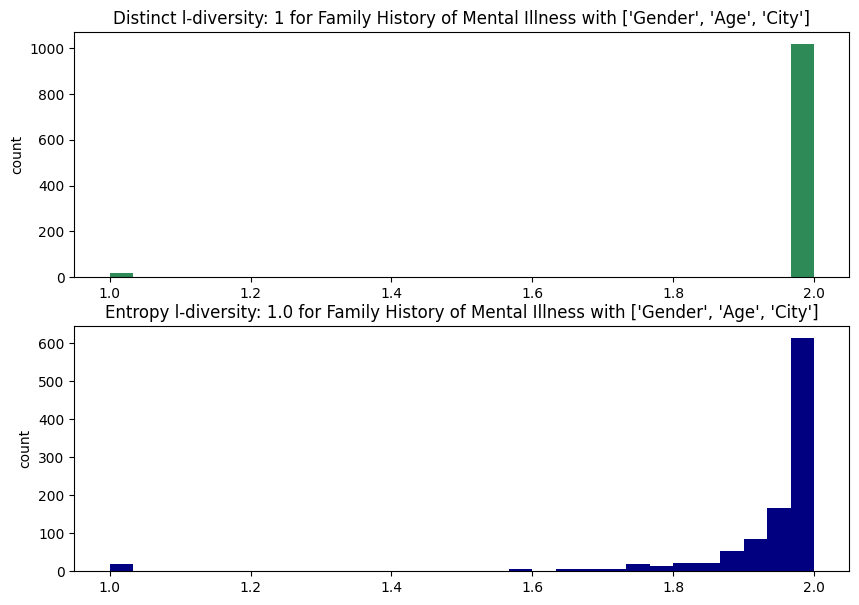

,Gender,Age,City,l (Depression)
5,Female,18.0,Delhi,1
77,Female,20.0,Mira,1
99,Female,21.0,Harsh,1
115,Female,21.0,Rashi,1
120,Female,21.0,Varanasi,1
262,Female,26.0,Nashik,1
270,Female,26.0,Varanasi,1
286,Female,27.0,Khaziabad,1
341,Female,29.0,Gaurav,1
414,Female,31.0,Nalyan,1


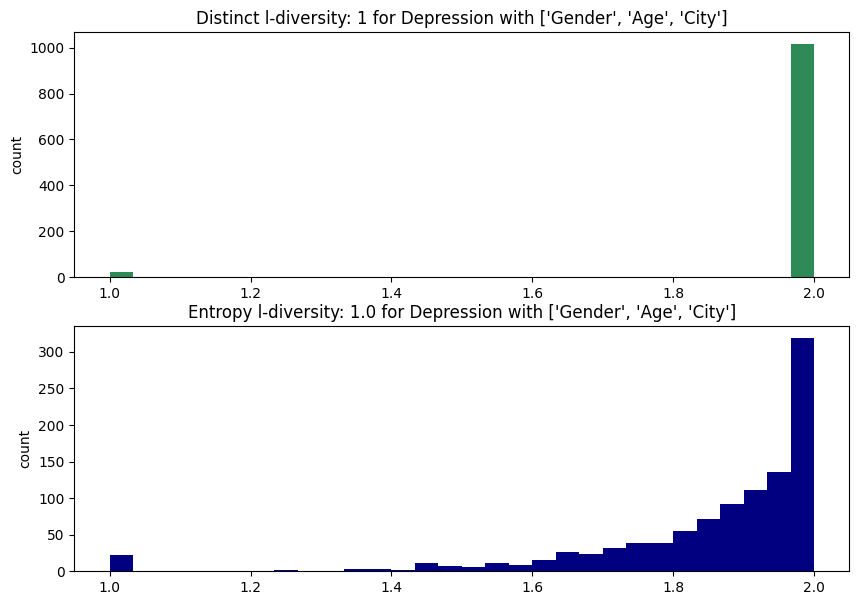

In [10]:
## Qid's 
qID = ['Gender','Age','City']

#qID = ['Age', 'Gender']
#qID = ['City']


## Data wash
## Remove entries with age 35 and over (small number)


df = df[df['Age'] < 35]

## remove "wired" cities
#wired_cities = ['City',"'Less Delhi'","'Less than 5 Kalyan'",'3.0', 'M.Com', 'M.Tech', 'ME','Saanvi', 'Gaurav','Harsh', 'Khaziabad', 'Kibara', 'Mihir', 'Mira', 'Nalini','Nalyan', 'Nandini','Rashi','Reyansh','Vaanya','Harsha','Bhavna'    ]
weird_cities = ['City',"'Less Delhi'","'Less than 5 Kalyan'",'3.0', 'M.Com', 'M.Tech', 'ME']
df = df[~df['City'].isin(weird_cities)]




## List of sensitive attributes
sensAttrs = {
   'CGPA': 10,
   'Study Satisfaction': 6,
   'Job Satisfaction': 5,
   'Sleep Duration': 5,
   'Dietary Habits': 4,
   'Have you ever had suicidal thoughts ?': 2,
   'Financial Stress': 6,
   'Family History of Mental Illness': 2,
   'Depression': 2,
}


def l_div_report(df, qID, sensAttrs):
  ## Loop over all sensitive attributes
  for sensAttr in sensAttrs.keys():
      
      ## Calculate distinct and entropy min l and l's for all equivalence classes  
      distinct_l,df_distinct_l = distinct_l_diversity(df,qID, sensAttr)
      entropy_l,df_entropy_l = entropy_l_diversity(df,qID, sensAttr)

      ## Dig out the column names with l's for later use
      distinct_column_name=(df_distinct_l.columns[-1])
      entropy_column_name=(df_entropy_l.columns[-1])

      ## Set a number of bins (not overwhelming the calculation)
      bins = 30 #100#len(df_distinct_l)
      
      ## Print out the l scores with lowest l
      display(df_distinct_l[df_distinct_l[distinct_column_name]==distinct_l])
      #diversity_scores = df.groupby(qID)[sensAttr].nunique()     
      #print(diversity_scores[diversity_scores == 1])

      ## Histogram plots
      fig = plt.figure(figsize=(10, 7))
      ax1 = fig.add_subplot(211)
      ax1.hist(df_distinct_l[distinct_column_name], bins=bins, color = 'seagreen')
      ax1.set_title(f"Distinct l-diversity: {distinct_l} for {sensAttr} with {qID}")
      ax1.set_ylabel('count')


      ax2 = fig.add_subplot(212)
      ax2.hist(df_entropy_l[entropy_column_name], bins=bins, color = 'navy')
      ax2.set_title(f"Entropy l-diversity: {entropy_l} for {sensAttr} with {qID}")
      ax2.set_ylabel('count')
      plt.show()



l_div_report(df, qID, sensAttrs)

## Sensitive values


### l-Diversity Mondrian

In [ ]:
# l-Diversity Mondrian
qID = ['Gender', 'Age', 'City']


# generalized_df, boundaries = Mondrian_l_diversity(df, qID, s, desired_l,
#                                                   Mondrian_choose_dim_highest_distinct,
#                                                   Mondrian_choose_cut_first_split_l_diversity)


def Mondrian_l_div_report(df, qID, sensitive_attributes,
                          choose_dim_fn, choose_cut_fn):
  for s in sensitive_attributes.keys():
    try:
      l, grouped = distinct_l_diversity(df, qID, s)
      desired_l = sensitive_attributes[s]
      generalized_df, boundaries = Mondrian_l_diversity(df, qID, s, desired_l,
                                                        choose_dim_fn, choose_cut_fn)
      # l_div_report(generalized_df, qID, {s: None})
      generalized_l, generalized_grouped = distinct_l_diversity(generalized_df, qID, s)
      print("--"*30)
      print(f'The table generalized to protect {s} satisfies distinct {generalized_l}-Diversity')
      
      
      d_cost = discernability_cost(grouped, metric=f'l ({s})')
      d_cost_gen = discernability_cost(generalized_grouped, metric=f'l ({s})')
      
      
      print(f'Its discernibility cost is {d_cost_gen}, {d_cost_gen * 100 / d_cost :2.2f}% higher than the ungeneralized table ({d_cost}).')
      display(generalized_grouped.groupby(qID).apply(lambda x: x.index.tolist(), include_groups=False))
      print("--"*30)


    except Exception as exception:
      print(exception)

Mondrian_l_div_report(df, qID, sensAttrs,
                      Mondrian_choose_dim_highest_distinct,
                      Mondrian_choose_cut_first_split_l_diversity)


The table generalized to protect CGPA satisfies distinct 10-Diversity
------------------------------------------------------------
Its discernibility cost is 713653, 102.10% higher than the ungeneralized table (698964).


Gender     Age           City            
(Female,)  (18.0, 18.0)  (Agra,)               [0]
                         (Ahmedabad,)          [1]
                         (Bangalore,)          [2]
                         (Bhopal,)             [3]
                         (Chennai,)            [4]
                                             ...  
(Male,)    (34.0, 34.0)  (Thane,)            [948]
                         (Vadodara,)         [949]
                         (Varanasi,)         [950]
                         (Vasai-Virar,)      [951]
                         (Visakhapatnam,)    [952]
Length: 953, dtype: object

------------------------------------------------------------
The table generalized to protect Study Satisfaction satisfies distinct 6-Diversity
------------------------------------------------------------
Its discernibility cost is 324, 1.34% higher than the ungeneralized table (24254).


Gender          Age           City                                                                                                                  
(Female, Male)  (18.0, 18.0)  (Agra, Ahmedabad)                                                                                                         [0]
                              (Vasai-Virar, Srinagar, Thane, Pune, Visakhapatnam, Varanasi, Surat, Rajkot, Vadodara)                                    [1]
                (18.0, 34.0)  (Bhopal, Bangalore, Bhavna)                                                                                               [2]
                              (Delhi, Faridabad, Chennai)                                                                                               [3]
                              (Ghaziabad, Jaipur, Kanpur, Harsh, Kolkata, Hyderabad, Kalyan, Harsha, Gaurav, Kibara, Khaziabad, Lucknow, Indore)        [4]
                              (Ludhiana, Meerut)                       

------------------------------------------------------------


Some of these costs are quite a bit higher after generalizing -- they are the binary attributes (eg Depression, Family History of Mental Illness) and cumulative GPA.